<a href="https://colab.research.google.com/github/piyush1856/netflix-data-analysis/blob/main/NetflixBusinessCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Introduction
 The rise of video streaming platforms has transformed the way audiences consume media content, with Netflix standing out as a pioneer and industry leader. As of mid-2021, Netflix boasts a global subscriber base of over 200 million and offers an extensive library of more than 8,000 movies and TV shows. Despite its success, the rapidly evolving entertainment landscape demands continuous innovation and data-driven decision-making to maintain its competitive edge and expand its market presence.

This case study aims to leverage data analysis and visualization techniques to uncover valuable insights from Netflix's content library. By examining various attributes of the shows and movies available on the platform, such as cast, directors, ratings, release year, duration, and genres, we can provide strategic recommendations to help Netflix optimize its content production and growth strategies.

As a data analyst at Netflix, the objective of this project is to delve into the dataset, identify trends, and generate actionable insights. The analysis will cover aspects like content distribution across different countries, historical trends in movie and TV show releases, optimal release times, and popular genres. Additionally, we will explore the contributions of various actors and directors, providing a comprehensive overview of the creative forces behind Netflix's offerings.

The findings from this analysis will be presented in a clear, data-driven manner, with the aim of aiding Netflix's executive team in making informed decisions about future content production and market expansion. By utilizing Python and its powerful libraries for data analysis and visualization, this project will demonstrate the practical application of data science skills in a real-world business context, offering valuable experience for aspiring data analysts and scientists.

# Objective
The primary objective of this case study is to conduct a comprehensive analysis of Netflix's content dataset to extract valuable insights and provide actionable recommendations. Specifically, we aim to:

1. **Identify Content Distribution Patterns:**

      * Determine the prevalence of different types of content (movies or TV shows) across various countries.
      * Highlight regional trends in content production to inform localized content strategies.
2. **Understand Historical Trends:**

    * Analyze the release patterns of movies and TV shows over the past few decades.
    * Assess the evolution of content volume and type to identify emerging trends.
3. **Optimize Release Timing:**

    * Identify the optimal weeks and months for releasing new TV shows and movies based on historical data.
    * Provide recommendations for release schedules to maximize viewer engagement.
4. **Evaluate Key Contributors:**

    * Analyze the contributions of actors and directors to determine the most influential figures in Netflix's content library.
    * Highlight top-performing directors and actors to guide future casting and collaboration decisions.
5. **Analyze Genre Popularity:**

    * Examine the distribution of genres to identify the most popular or frequently produced types of content.
    * Use this information to recommend genre-focused content production strategies.
6. **Understand Time-to-Market:**

    * Calculate the time taken for movies to be added to Netflix after their initial release.
    * Provide insights on optimizing the addition of new content to keep the library fresh and engaging.

By achieving these objectives, the project aims to provide Netflix with data-driven recommendations that will enhance its content strategy, cater to diverse regional preferences, and support its continued growth and success in the highly competitive streaming market.

# Netflix Dataset Description

The dataset provided for this analysis includes a comprehensive listing of all movies and TV shows available on Netflix, with details such as:

- **Show_id**: Unique ID for every movie or TV show.
- **Type**: Identifier specifying whether the content is a movie or TV show.
- **Title**: Title of the movie or TV show.
- **Director**: Director of the movie.
- **Cast**: Actors involved in the movie/show.
- **Country**: Country where the movie/show was produced.
- **Date_added**: Date the content was added to Netflix.
- **Release_year**: Actual release year of the movie/show.
- **Rating**: TV rating of the movie/show.
- **Duration**: Total duration in minutes or number of seasons.
- **Listed_in**: Genre of the content.
- **Description**: Summary description of the content.

# Approach

To achieve the objectives of this case study, we will follow a structured approach:

### Data Exploration and Preprocessing:

- Load the dataset and examine its structure.
- Handle missing values by appropriate imputation or removal.
- Un-nest columns with multiple comma-separated values to create multiple rows.

### Basic Analysis:

- Calculate basic metrics and perform value counts for categorical variables.
- Conduct non-graphical analysis to understand the distribution of categorical variables.
- Perform graphical analysis using count plots and other relevant visualizations.

### Comparative Analysis:

- Compare the number of movies and TV shows produced in each country.
- Identify the top 10 countries for movie and TV show production.

### Timing Analysis:

- Determine the best weeks and months to release new content based on historical data.

### Contributor Analysis:

- Identify the top 10 actors and directors based on the number of movies or TV shows they are associated with.

### Genre Analysis:

- Use word clouds and other visualizations to analyze the popularity of different genres.

### Time-to-Market Analysis:

- Calculate the time taken for movies to be added to Netflix after their initial release and provide insights on optimizing this process.

### Insights and Recommendations:

- Summarize key insights derived from the analysis.
- Provide actionable recommendations for Netflix based on the data-driven insights.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from datetime import datetime
import re
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("netflix_data.csv")
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3091,s3092,Movie,"El Pepe, a Supreme Life",Emir Kusturica,"José Mujica, Emir Kusturica","Argentina, Uruguay, Serbia","December 27, 2019",2018,TV-14,73 min,"Documentaries, International Movies","In this intimate documentary, former Uruguayan..."
6515,s6516,Movie,Colkatay Columbus,Saurav Palodhi,"Mir Afsar Ali, Gaurav Chakrabarty, Tanusree Ch...",India,"March 30, 2017",2016,TV-14,118 min,"Comedies, Dramas, Independent Movies",When Christopher Columbus mysteriously appears...
6702,s6703,Movie,Equals,Drake Doremus,"Nicholas Hoult, Kristen Stewart, Jacki Weaver,...","United States, Indonesia","October 28, 2018",2015,PG-13,102 min,"Dramas, Romantic Movies, Sci-Fi & Fantasy",Two young lovers depart from the norm simply b...
2062,s2063,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,"September 1, 2020",2017,TV-MA,2 Seasons,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...
4970,s4971,Movie,"Game Over, Man!",Kyle Newacheck,"Adam DeVine, Anders Holm, Blake Anderson, Utka...",United States,"March 23, 2018",2018,TV-MA,102 min,"Action & Adventure, Comedies",Three buddies with big dreams go from underach...
7732,s7733,Movie,Peter Rabbit,Will Gluck,"James Corden, Domhnall Gleeson, Rose Byrne, Ma...","United States, Australia","August 18, 2018",2018,PG,95 min,"Children & Family Movies, Comedies","In this mix of live action and CGI, rascally P..."
3308,s3309,Movie,Tune in for Love,Jung Ji-woo,"Kim Go-eun, Jung Hae-in, Park Hae-joon, Kim Gu...",South Korea,"November 5, 2019",2019,TV-MA,123 min,"Dramas, International Movies, Romantic Movies",A student and a reticent teen first meet at a ...
8333,s8334,Movie,The Great Raid,John Dahl,"Benjamin Bratt, James Franco, Connie Nielsen, ...","United States, Australia","November 1, 2019",2005,R,133 min,"Action & Adventure, Dramas","In World War II, a battalion goes on a daring ..."
1561,s1562,Movie,Torbaaz,Girish Malik,"Sanjay Dutt, Nargis Fakhri, Rahul Dev, Priyank...",India,"December 11, 2020",2020,TV-MA,133 min,"Dramas, International Movies, Sports Movies","At an Afghanistan refugee camp, an ex-army doc..."
5175,s5176,TV Show,Lady Dynamite,NaN,"Maria Bamford, Fred Melamed, Mary Kay Place, E...",United States,"November 10, 2017",2017,TV-MA,2 Seasons,TV Comedies,Comedian Maria Bamford stars in a series inspi...


# Shape and Data Type of Dataset

In [ ]:
# Shape of data
df.shape

(8807, 12)

In [ ]:
# information about datatype of dataset
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
# From the above result we can see date_added column is of object type. Hence, it should be converted to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [ ]:
# Getting earliest and latest date of data added (Data Duration Range)
earliest_date = df['date_added'].min()
latest_date = df['date_added'].max()

# Formatting dates to a readable format
earliest_date_str = earliest_date.strftime('%B %d, %Y')
latest_date_str = latest_date.strftime('%B %d, %Y')

# Printing the formatted dates
print(f"Earliest Date Added: {earliest_date_str}")
print(f"Latest Date Added: {latest_date_str}")

Earliest Date Added: January 01, 2008
Latest Date Added: September 25, 2021


# Handling missing values


In [ ]:
# Getting count of null/missing values in dataset

null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)

null_values

,index,null_count
0,director,2634
1,country,831
2,cast,825
3,date_added,98
4,rating,4
5,duration,3
6,show_id,0
7,type,0
8,title,0
9,release_year,0


### Handling Duration column null values

In [ ]:
# Get distinct values in the 'type' column
distinct_types = df['type'].unique()
distinct_types

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
# Get the mode of Duration column according to the 'type' of data
movie_mode_duration = df[df['type'] == 'Movie']['duration'].mode()[0]
tv_show_mode_duration = df[df['type'] == 'TV Show']['duration'].mode()[0]
movie_mode_duration,tv_show_mode_duration


('90 min', '1 Season')

In [ ]:
# Define a function to fill missing duration values based on type
def fill_duration(row):
    if pd.isnull(row['duration']):
        if row['type'] == 'Movie':
            return movie_mode_duration
        else:
            return tvshow_mode_duration
    return row['duration']

In [ ]:
# Applying the fill_duration function to dataset
df['duration'] = df.apply(fill_duration, axis=1)

In [ ]:
# Confirming their is no null values in duration column
df['duration'].isnull().sum()

0

### Handling Rating column null values

In [ ]:
# Checking the unique value counts in Rating column
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [ ]:
# We can see 74 min, 84 min, 66 min as incorrect data entry. Hence, need to handle it along with nulls

# Creating a dictionary to store the count of each (Genre, Rating) pair across the dataset
genre_rating_counts = defaultdict(int)

# Populate the dictionary with valid (Genre, Rating) pairs
for index, row in df.iterrows():
    # Check that both 'rating' and 'listed_in' are not null and that 'rating' does not contain 'min'
    if pd.notnull(row['rating']) and pd.notnull(row['listed_in']) and 'min' not in row['rating']:

        # Split the 'listed_in' column into a list of genres
        genres = row['listed_in'].split(', ')

        # Create genre-rating pairs and update the count in the dictionary
        for genre in genres:
            genre_rating_pair = (genre, row['rating'])
            genre_rating_counts[genre_rating_pair] += 1


In [ ]:
# Defining a function to replace nulls or incorrect data with the highest count of pair in genre_rating_counts among all possible pairs for a row
def replace_null_incorrect_rating(row, genre_rating_counts):
    # Check if rating is null or contains 'min' (incorrect data)
    if pd.isnull(row['rating']) or 'min' in str(row['rating']):
        genres = row['listed_in'].split(', ')

        # Dictionary to store counts of possible ratings for this row's genres
        possible_ratings = defaultdict(int)

        for genre in genres:
            for (g, r), count in genre_rating_counts.items():
                if g == genre:
                    possible_ratings[r] += count

        # Print possible_ratings to verify its content
        print(f"Possible Ratings for Row with show_id {row['show_id']}: {possible_ratings}")

        # If possible_ratings is not empty, find the most common rating
        if possible_ratings:
            most_common_rating = max(possible_ratings, key=possible_ratings.get)
            print(f"Choosen Ratings for Row with show_id {row['show_id']}: {most_common_rating}")
            return most_common_rating

    # Return the original rating if it is neither null nor incorrect
    return row['rating']


In [ ]:
# Apply the function to replace null or incorrect ratings
df['rating'] = df.apply(lambda row: replace_null_incorrect_rating(row, genre_rating_counts), axis=1)

Possible Ratings for Row with show_id s5542: defaultdict(<class 'int'>, {'TV-MA': 13, 'TV-14': 3, 'TV-G': 3, 'TV-Y': 17, 'R': 1, 'TV-PG': 7, 'TV-Y7': 9})
Choosen Ratings for Row with show_id s5542: TV-Y
Possible Ratings for Row with show_id s5795: defaultdict(<class 'int'>, {'TV-MA': 13, 'TV-14': 3, 'TV-G': 3, 'TV-Y': 17, 'R': 1, 'TV-PG': 7, 'TV-Y7': 9})
Choosen Ratings for Row with show_id s5795: TV-Y
Possible Ratings for Row with show_id s5814: defaultdict(<class 'int'>, {'TV-MA': 13, 'TV-14': 3, 'TV-G': 3, 'TV-Y': 17, 'R': 1, 'TV-PG': 7, 'TV-Y7': 9})
Choosen Ratings for Row with show_id s5814: TV-Y
Possible Ratings for Row with show_id s5990: defaultdict(<class 'int'>, {'TV-MA': 13, 'TV-14': 3, 'TV-G': 3, 'TV-Y': 17, 'R': 1, 'TV-PG': 7, 'TV-Y7': 9})
Choosen Ratings for Row with show_id s5990: TV-Y
Possible Ratings for Row with show_id s6828: defaultdict(<class 'int'>, {'TV-14': 543, 'TV-Y7': 29, 'TV-MA': 773, 'TV-PG': 151, 'TV-Y': 2, 'TV-G': 24, 'NR': 2, 'R': 1})
Choosen Ratings for

In [ ]:
# Confirming their is no null or incorrect values in rating column
df[df['rating'].str.contains('min', na=False, case=False) | df['rating'].isnull()].shape[0]

0

### Handling Date Added column null values

In [ ]:
# Checking null values count in date_added column
df['date_added'].isnull().sum()

98

In [ ]:
# Extract the year from 'date_added'
df['date_added_year'] = df['date_added'].dt.year

# Calculate the difference between release_year and date_added_year for movies and TV shows separately
df['year_diff'] = df['release_year'] - df['date_added_year']

# Calculate the median of the difference for movies and TV shows separately
movie_median_diff = df[df['type'] == 'Movie']['year_diff'].median()
tv_show_median_diff = df[df['type'] == 'TV Show']['year_diff'].median()

# Convert medians to integers
movie_median_diff = int(movie_median_diff)
tv_show_median_diff = int(tv_show_median_diff)

In [ ]:
# Function to fill null date_added based on the type
def fill_null_date_added(row, movie_median_diff, tv_show_median_diff):
    if pd.isnull(row['date_added']):
        if row['type'] == 'Movie':
            return datetime(int(row['release_year']) - movie_median_diff, 1, 1)
        elif row['type'] == 'TV Show':
            return datetime(int(row['release_year']) - tv_show_median_diff, 1, 1)
    else:
        return row['date_added']

In [ ]:
# Apply the function to fill null date_added values
df['date_added'] = df.apply(lambda row: fill_null_date_added(row, movie_median_diff, tv_show_median_diff), axis=1)

# Drop the temporary columns
df.drop(columns=['date_added_year', 'year_diff'], inplace=True)

In [ ]:
# Check if there are any remaining null values in date_added
df['date_added'].isnull().sum()

0

### Handling Country column null values

In [ ]:
# Checking null values count in country column
df['country'].isnull().sum()

831

In [ ]:
# To address the null values in the country column, we will use the most frequently occurring country associated with a director or cast member as the fill value.
# If both the director and cast are null, we will replace the null values in the country column with 'Missing Value'.

# Unnesting the director, cast and country coloumn in a single dataset

# Unnest 'country' column
countries_df = df[['show_id', 'country']].dropna(subset=['country'])
countries_df = countries_df.assign(country=countries_df['country'].str.split(', ')).explode('country')

# Unnest 'director' column
directors_df = df[['show_id', 'director']].dropna(subset=['director'])
directors_df = directors_df.assign(director=directors_df['director'].str.split(', ')).explode('director')

# Unnest 'cast' column
casts_df = df[['show_id', 'cast']].dropna(subset=['cast'])
casts_df = casts_df.assign(cast=casts_df['cast'].str.split(', ')).explode('cast')

# Merge director and country
merged_df_director_country = pd.merge(directors_df, countries_df, on='show_id', how='inner')

# Merge cast and country
merged_df_cast_country = pd.merge(casts_df, countries_df, on='show_id', how='inner')


In [ ]:
# Getting most frequent country for each director
director_most_frequent_country = merged_df_director_country.groupby('director')['country'].apply(lambda x: x.value_counts().idxmax()).to_dict()
# Getting most frequent country for each cast
cast_most_frequent_country = merged_df_cast_country.groupby('cast')['country'].apply(lambda x: x.value_counts().idxmax()).to_dict()


In [ ]:
def fill_null_country(row, director_most_frequent_country, cast_most_frequent_country):
    # Helper function to get most frequent countries for given names
    def get_most_frequent_countries(names, country_dict):
        countries = set()
        for name in names:
            if name in country_dict:
                countries.add(country_dict[name])
        return ', '.join(countries)

    # Handle null values in the 'country' column
    if pd.isnull(row['country']):
        # Split the 'director' columns into lists if they are not null
        directors = row['director'].split(', ') if pd.notnull(row['director']) else []

        # Get most frequent country based on director
        if directors:
            director_countries = get_most_frequent_countries(directors, director_most_frequent_country)
            if director_countries:
                return director_countries

        # Split the 'director' columns into lists if they are not null
        casts = row['cast'].split(', ') if pd.notnull(row['cast']) else []

        # Get most frequent country based on cast
        if casts:
            cast_countries = get_most_frequent_countries(casts, cast_most_frequent_country)
            if cast_countries:
                return cast_countries

        # If both are empty or no country found, return 'Missing Country'
        return 'Missing Country'

    # Return the original country if it's not null
    return row['country']


In [ ]:
# Apply the function to fill null country values
df['country'] = df.apply(lambda row: fill_null_country(row, director_most_frequent_country, cast_most_frequent_country), axis=1)


In [ ]:
# Check if there are any remaining null values in country
df['country'].isnull().sum()

0

### Handling Cast column null values

In [ ]:
df['cast'].isnull().sum()

825

In [ ]:
# To address null values in the cast column, we will first check if any cast members are mentioned in the description column.
# If cast members are found in the description, we will add them to the cast column as comma-separated values.
# If no cast members are found, we will assign "Missing Cast" to the cast column.

# Getting all the unique casts from dataset
unique_cast_list = casts_df['cast'].unique().tolist()

# Filter the unique_cast_list to only include casts with two or more words to make data more consistence
filtered_cast_list = [cast for cast in unique_cast_list if len(cast.split()) >= 2]

# Create a dictionary of regex patterns for each cast
cast_patterns = {cast: re.compile(r'\b' + re.escape(cast) + r'\b') for cast in filtered_cast_list}

In [ ]:
# Defining a function that will find and update the missing values in cast column : if any cast found in description column it will update that else update with 'Missing Cast'
def find_casts_in_description(description, patterns):
    found_casts = []
    for cast, pattern in patterns.items():
        if pattern.search(description):
            found_casts.append(cast)
    return ', '.join(found_casts) if found_casts else 'Missing Cast'

In [ ]:
# Apply the function to fill null cast values
df['cast'] = df.apply(lambda row: find_casts_in_description(row['description'], cast_patterns)
                     if pd.isnull(row['cast']) else row['cast'], axis=1)


In [ ]:
# Check if there are any remaining null values in cast
df['cast'].isnull().sum()

0

### Handling Director column null values

In [ ]:
df['director'].isnull().sum()

2634

In [ ]:
# To address null values in the director column, we will first check if any director are mentioned in the description column.
# If directors are found in the description, we will add them to the cast column as comma-separated values.
# If no directors are found, we will assign "Missing Director" to the director column.

# Getting all the unique director from dataset
unique_director_list = directors_df['director'].unique().tolist()

# Filter the unique_director_list to only include director with five or more character to make data more consistence
filtered_director_list = [director for director in unique_director_list if len(director) >= 5]

# Create a dictionary of regex patterns for each cast
director_patterns = {director: re.compile(r'\b' + re.escape(director) + r'\b') for director in filtered_director_list}

In [ ]:
# Defining a function that will find and update the missing values in director column : if any director found in description column it will update that else update with 'Missing Director'
def find_directors_in_description(description, patterns):
    found_directors = []
    for director, pattern in patterns.items():
        if pattern.search(description):
            found_directors.append(director)
    return ', '.join(found_directors) if found_directors else 'Missing Director'

In [ ]:
# Apply the function to fill null cast values
df['director'] = df.apply(lambda row: find_directors_in_description(row['description'], director_patterns)
                     if pd.isnull(row['director']) else row['director'], axis=1)

In [ ]:
# Check if there are any remaining null values in director
df['director'].isnull().sum()

0

In [ ]:
# finally checking if all the missing value is handled or not
null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)

null_values

,index,null_count
0,show_id,0
1,type,0
2,title,0
3,director,0
4,cast,0
5,country,0
6,date_added,0
7,release_year,0
8,rating,0
9,duration,0


# Un-nest columns with multiple comma-separated values

In [ ]:
# Identifying column with comma separated values

def identify_columns_to_unnest(df):
    columns_to_unnest = []
    for column in df.columns:
        if df[column].astype(str).str.contains(',').any():
            columns_to_unnest.append(column)
    return columns_to_unnest

columns_to_unnest = identify_columns_to_unnest(df)
columns_to_unnest

['title', 'director', 'cast', 'country', 'listed_in', 'description']

From the above output we can the column those have comma separated values. Among those we will be unnesting **director**, **cast**, **country**, **listed_in** for better analysis of data.

In [ ]:
# Defining a common function to unest coloumn :
# This function will return a new dataframe with the unested column and title as index

def unnest_column(df, column_name):
    # Ensure the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame")

    # Apply the split and stack process to unnest the column
    unnested_df = pd.DataFrame(df[column_name].apply(lambda x: str(x).split(', ')).tolist(), index = df['title'])
    unnested_df = unnested_df.stack().reset_index()
    unnested_df.drop('level_1', axis = 1, inplace = True)

    unnested_df.rename(columns = {0 : column_name}, inplace = True)

    return unnested_df

In [ ]:
# Creating a new dataframes according to column to be unnested
cast_df = unnest_column(df, 'cast')
director_df = unnest_column(df, 'director')
country_df = unnest_column(df, 'country')
listed_in_df = unnest_column(df, 'listed_in')

In [ ]:
# Merging the new Dataframes (cast_df, director_df, country_df, listed_in_df)

merged_df_dir_cast_listed_in_country = (
    director_df
    .merge(cast_df, on='title', how='inner')
    .merge(listed_in_df, on='title', how='inner')
    .merge(country_df, on='title', how='inner')
)

merged_df_dir_cast_listed_in_country.sample(10)


,title,director,cast,listed_in,country
69959,Freaks,Adam B. Stein,Bruce Dern,Thrillers,United States
80182,Defiance,Edward Zwick,Tomas Arana,Action & Adventure,United States
84311,The Lies Within,Missing Director,Lee Jun-hyeok,Crime TV Shows,South Korea
181334,Ralph Breaks the Internet: Wreck-It Ralph 2,Rich Moore,Paige O'Hara,Children & Family Movies,United States
5589,EDENS ZERO,Missing Director,Hochu Otsuka,International TV Shows,Japan
180950,Quantum of Solace,Marc Forster,Judi Dench,Action & Adventure,United States
43105,A Very Special Love,Cathy Garcia-Molina,Rowell Santiago,International Movies,Philippines
110304,In Darkness,Anthony Byrne,Ed Skrein,Independent Movies,United States
180520,Power Rangers Turbo,Missing Director,Hilary Shepard,Kids' TV,France
60522,The Disaster Artist,James Franco,Paul Scheer,Dramas,United States


In [ ]:
# now merging the original dataframe to the new dataframe to get all the remaining column
final_df = merged_df_dir_cast_listed_in_country.merge(
    df[['show_id', 'type', 'date_added', 'release_year', 'rating', 'duration', 'description', 'title']],
    on='title',
    how='inner'
)

# Changing the name of listed_in column as `genre`
final_df.rename(columns={'listed_in': 'genre'}, inplace=True)
final_df.head()

,title,director,cast,genre,country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Missing Cast,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Missing Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Missing Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Missing Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Missing Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


# Handling Duplicate Records

In [ ]:
# Checking the number of duplicate
duplicate_records = final_df[final_df.duplicated()]
print(f"Number of duplicate records: {duplicate_records.shape[0]}")


Number of duplicate records: 55


In [ ]:
# Removing the duplicate records
final_df.drop_duplicates(keep='first', inplace = True)

# Resetting the index
final_df.reset_index(drop=True, inplace=True)

In [ ]:
# Confirming if the duplicates have been dropped or not
duplicate_records = final_df[final_df.duplicated()]
print(f"Number of duplicate records: {duplicate_records.shape[0]}")

Number of duplicate records: 0


# Dataset Overview, Statistical Summary and Basic Metrics

Currently, we will be utilizing two dataframes for our analysis. Depending on future requirements, we may increase the number of dataframes:

  * `df`: This is the original dataframe constructed at the beginning when loading the CSV file. Null values in this dataframe have been handled, and it contains unique `show_id` and `title` values.

  * `final_df` : This dataframe extends `df` by melting the values in comma-separated columns into corresponding rows. As a result, it contains duplicate `show_id` and `title` values.

In [ ]:
# overview of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
# overview of final_df
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205248 entries, 0 to 205247
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         205248 non-null  object        
 1   director      205248 non-null  object        
 2   cast          205248 non-null  object        
 3   genre         205248 non-null  object        
 4   country       205248 non-null  object        
 5   show_id       205248 non-null  object        
 6   type          205248 non-null  object        
 7   date_added    205248 non-null  datetime64[ns]
 8   release_year  205248 non-null  int64         
 9   rating        205248 non-null  object        
 10  duration      205248 non-null  object        
 11  description   205248 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.8+ MB


In [ ]:
# statistical summamry
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807.000000,8807,8807,8807,8807
unique,8807,2,8807,4531,7710,784,NaN,NaN,14,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Missing Director,Missing Cast,United States,NaN,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2602,799,2928,NaN,NaN,3210,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-25 19:43:27.516748288,2014.180198,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1967-01-01 00:00:00,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-01 00:00:00,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-01 00:00:00,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-18 00:00:00,2019.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,NaN


**Basic Metrics**

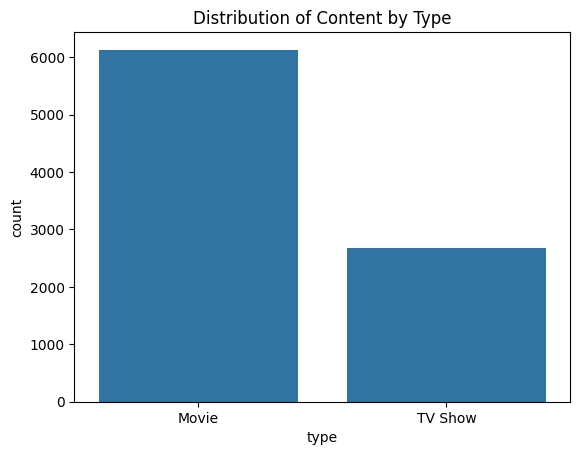

In [ ]:
# Distribution of content by type
sns.countplot(x='type', data=df)
plt.title('Distribution of Content by Type')
plt.show()

From the above output we can conclude :
1. Movies Dominate: The dataset contains more movies than TV shows.
2. Content Composition: Movies constitute a larger portion of the dataset.
3. Recommendation Focus: If this analysis pertains to a recommendation system, it suggests that movie recommendations might be more prevalent due to their higher count.

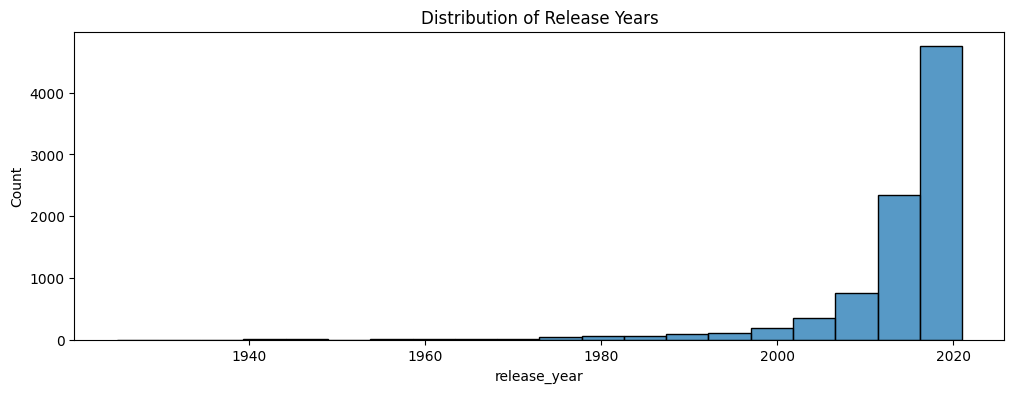

In [ ]:
# Distribution of release years
plt.figure(figsize=(12, 4))
sns.histplot(df['release_year'], bins=20)
plt.title('Distribution of Release Years')
plt.show()

Based on the histogram titled above “Distribution of Release Years,” we can draw the following conclusions:

1. Increasing Trend: The histogram shows an increasing trend in the number of content releases over time. There is a significant spike in recent years (leading up to 2020), suggesting a surge in content production.
2. Recent Dominance: The rightmost bins (representing recent years) have higher counts, indicating that more content has been released in recent times compared to earlier decades.
Content.
3. Industry Growth: This trend aligns with the growth of the content industry, especially in the digital streaming era.

In summary, the dataset reflects an upward trajectory in content releases, with recent years witnessing a substantial increase.

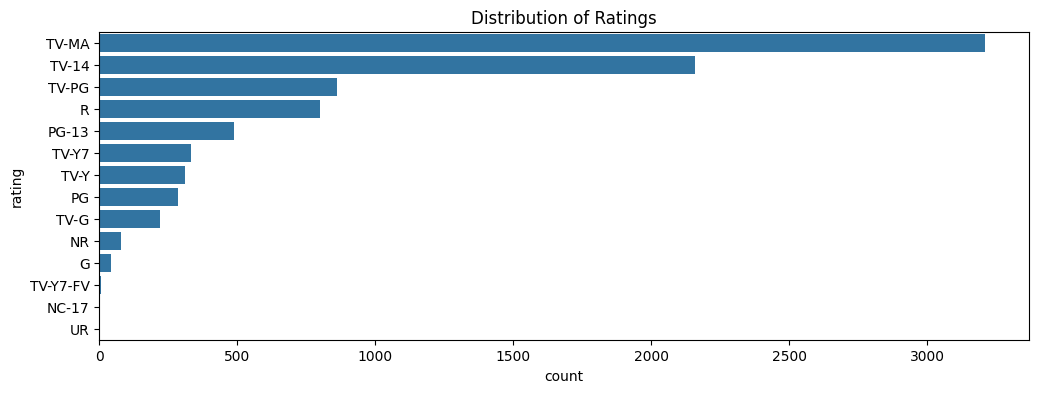

In [ ]:
# Distribution of ratings
plt.figure(figsize=(12, 4))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()

Based on the above “Distribution of Ratings” chart, we can draw the following conclusions:

1. TV-MA Dominance: The highest count belongs to the TV-MA rating, indicating that content with mature themes is prevalent.
2. Variety of Ratings: The dataset includes a range of ratings, from TV-Y (suitable for children) to R (restricted).
3. Content Diversity: The presence of various ratings suggests a diverse content library, catering to different audiences.
4. Platform Considerations: Understanding the distribution of ratings is crucial for content platforms to tailor recommendations and parental controls.

In summary, the dataset covers a wide spectrum of ratings, with TV-MA being the most common.

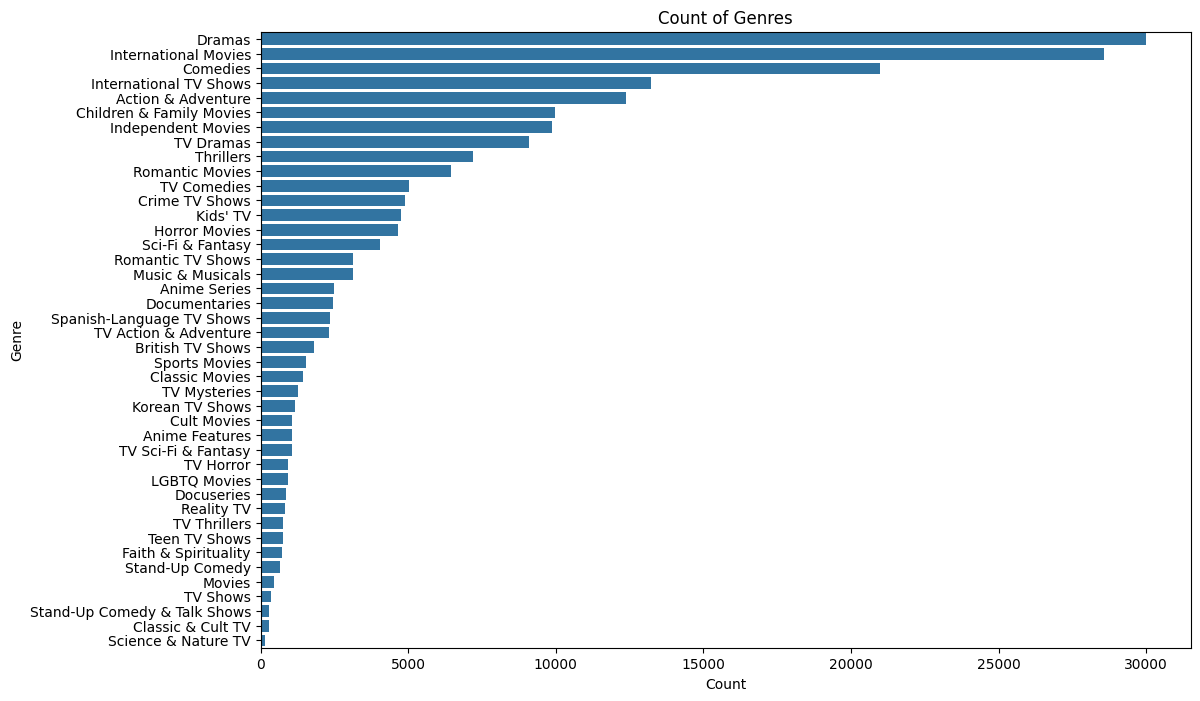

In [ ]:
# Distribution of genre

genre_counts = final_df['genre'].value_counts()

# Plot the genre counts
plt.figure(figsize=(12, 8))
sns.barplot(y=genre_counts.index, x=genre_counts.values)
plt.title('Count of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

The above bar chart titled “Count of Genres” provides insights into the distribution of different genres within a dataset. Here are the key takeaways:

* Dramas: The most common genre, with a high count.
* International Movies: Also prevalent, catering to global audiences.
* Comedies: Popular for light-hearted entertainment.
* Action & Adventure: Appeals to fans of thrilling content.
* Children & Family Movies: Indicates family-friendly options.
* Independent Movies: Represents non-mainstream films.
* TV Dramas: Reflects the popularity of serialized drama series.
* Thrillers: Captures suspense and excitement.
Romantic Movies: Appeals to romance enthusiasts.
* TV Comedies: Comedy series have a significant count.

In summary, this dataset covers a diverse range of genres, with dramas and international movies leading the way.

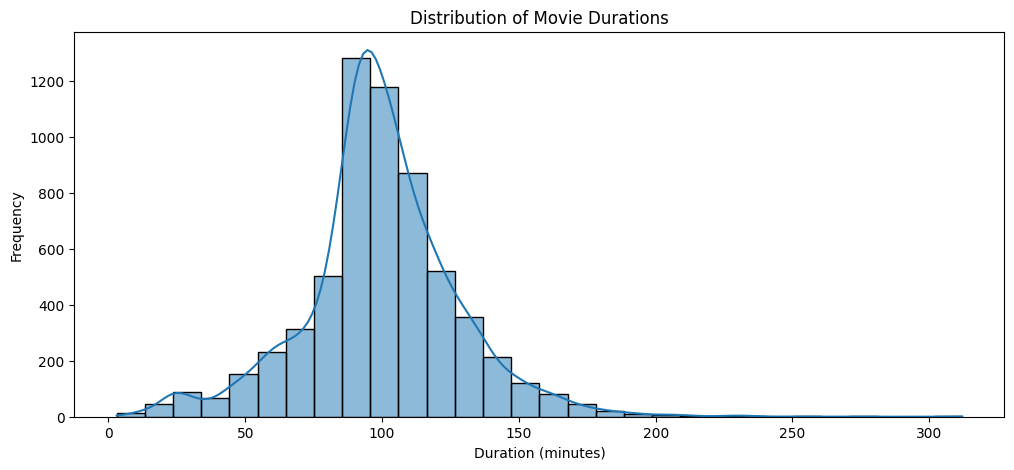

In [ ]:
# Distribution of movies by duration
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(int)
plt.figure(figsize=(12, 5))
sns.histplot(movies_df['duration_minutes'], bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


The histogram titled “Distribution of Movie Durations” provides insights into the typical lengths of movies within the dataset. Here are the key takeaways:

1. Peak Around 100 Minutes: The most common movie duration falls around 100 minutes. This suggests that many movies have a runtime close to this value.
2. Right-Skewed Distribution: The histogram is right-skewed, indicating that there are fewer movies with longer durations and more with shorter durations.
3. Industry Standard: A significant number of movies adhere to the industry standard of approximately 90 to 120 minutes.

In summary, most movies in the dataset have durations around 100 minutes, but there is a diverse range of movie lengths.

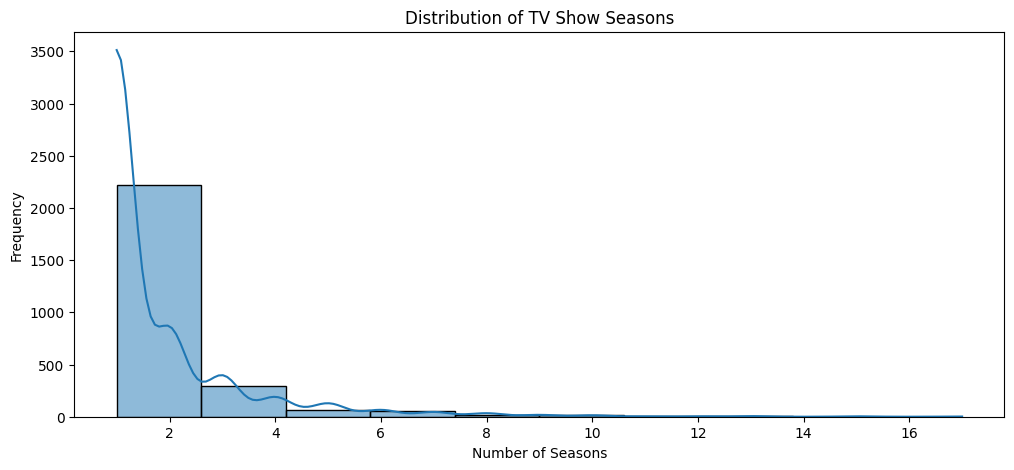

In [ ]:
# Distribution of tv shows by duration

tv_shows_df = df[df['type'] == 'TV Show'].copy()
tv_shows_df['duration_seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(int)
plt.figure(figsize=(12, 5))
sns.histplot(tv_shows_df['duration_seasons'], bins=10, kde=True)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()

The histogram titled “Distribution of TV Show Seasons” provides insights into the typical number of seasons for TV shows within the dataset. Here are the key takeaways:

1. Peak at One Season: The most common scenario is TV shows having only one season.
2. Decreasing Frequency: As the number of seasons increases, the frequency of TV shows sharply decreases.
3. Long-Running Shows: While most shows have fewer seasons, there are some with multiple seasons (e.g., 10 or more).

In summary, TV shows in this dataset tend to have shorter runs, but there are exceptions with longer durations.

# Non-Graphical Analysis

In [ ]:
# Display value counts for 'type' column
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Here are the value counts for the ‘type’ column in the dataset:

* Movies: There are 6131 entries categorized as movies.
* TV Shows: There are 2676 entries categorized as TV shows.

This breakdown provides an overview of the content distribution between movies and TV shows within the dataset.

In [ ]:
# Display value counts for 'rating' column
df['rating'].value_counts()

rating
TV-MA       3210
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         311
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

The 'rating' column shows a diverse range of content ratings.

The most common ratings are:

* TV-MA (3210 counts): Targeted at mature audiences.
* TV-14 (2160 counts): Suitable for teenagers and older.
* TV-PG (863 counts): Indicates parental guidance suggested.
* R (799 counts): Restricted content, for adults.
* PG-13 (490 counts): Suitable for viewers 13 and older.

Less common ratings include TV-Y7 (334 counts), TV-Y (311 counts), PG (287 counts), TV-G (220 counts), and a few others such as NR, G, TV-Y7-FV, NC-17, UR.

This distribution highlights a focus on content for mature and teenage audiences, with a notable amount of family-friendly content.

In [ ]:
# Display value counts for 'listed_in' column (genres)
unique_genres_df = final_df[['show_id', 'genre']].drop_duplicates()
unique_genres_df['genre'].value_counts()

genre
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                 

* International Movies, Dramas, and Comedies are the top three genres.
* Action & Adventure (859) and TV Dramas (763) are also prevalent.
* Niche genres such as Classic Movies (116), LGBTQ Movies (102), and Anime Features (71) have fewer occurrences.
* Least frequent genres include Classic & Cult TV (28) and TV Shows (16).

In [ ]:
# Display value counts for 'country' column
unique_country_df = final_df[['show_id', 'country']].drop_duplicates()
unique_country_df['country'].value_counts()

country
United States     3879
India             1157
United Kingdom     839
Canada             472
France             413
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: count, Length: 128, dtype: int64

* United States, India, and the United Kingdom are the top three countries.
* Canada (472) and France (413) also have a significant presence.
* Countries like Ecuador, Armenia, Mongolia, Bahamas, and Montenegro each appear only once.
* A total of 128 unique countries are represented in the dataset.

# Visual Analysis

## Find the number of movies produced in each country and pick the top 10 countries.

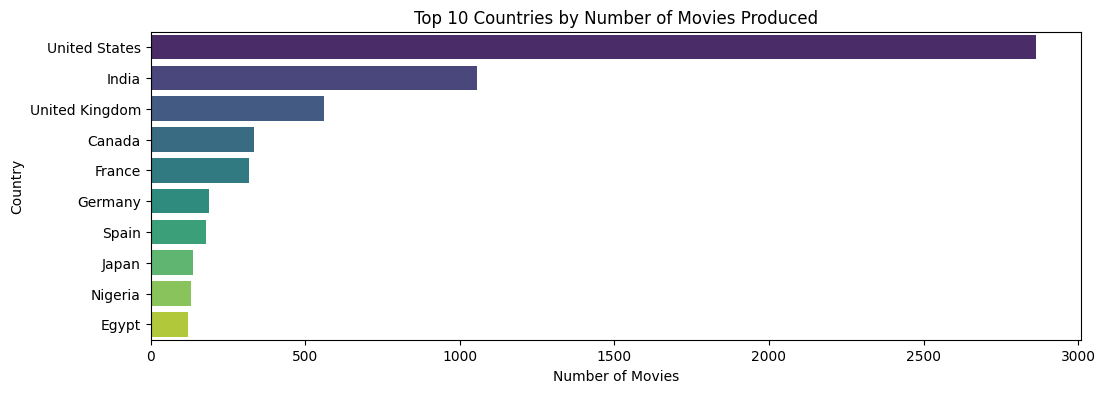

In [ ]:
# Filter the final_df for movies
movies_final_df = final_df[final_df['type'] == 'Movie']

# Drop duplicates to count each movie-country pair only once
unique_movies_final_df = movies_final_df[['show_id', 'country']].drop_duplicates()

# Count the number of movies produced in each country
country_movie_counts = unique_movies_final_df['country'].value_counts()

# Pick the top 10 countries
top_10_countries = country_movie_counts.head(10).reset_index()
top_10_countries.columns = ['country', 'count']

# Plot the top 10 countries
plt.figure(figsize=(12, 4))
sns.barplot(data=top_10_countries, x='count', y='country', palette="viridis", hue='country', dodge=False, legend=False)
plt.title('Top 10 Countries by Number of Movies Produced')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.show()

* Inference:
  * The United States leads in movie production, followed by India and the United Kingdom.
  * Other countries listed (Canada, France, Germany, Spain, Japan, Nigeria, and Egypt) have significantly lower movie output.
* Recommendation:
  * Stakeholders in film industries outside the top two countries can explore growth opportunities.
  * Consider investing in local movie production or niche markets.
  * Learn from successful practices in leading industries.

## Find the number of Tv-Shows produced in each country and pick the top 10 countries.


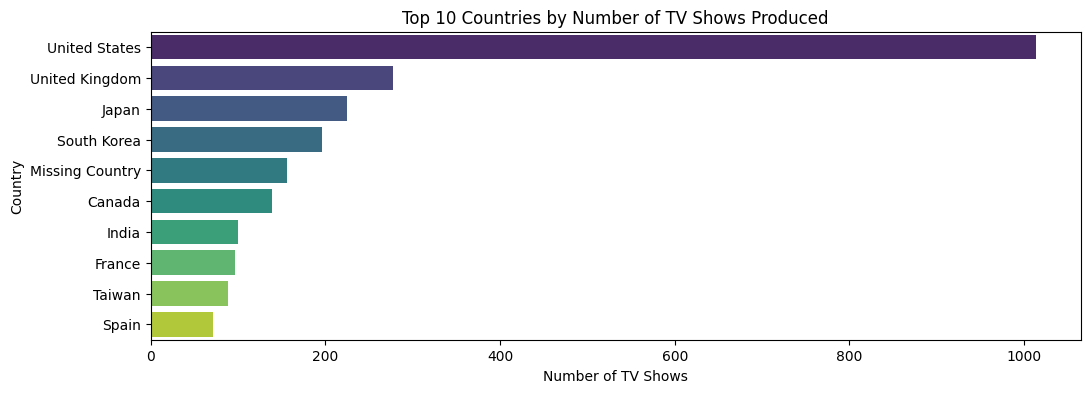

In [ ]:
# Filter the final_df for TV Shows
tv_shows_final_df = final_df[final_df['type'] == 'TV Show']

# Drop duplicates to count each TV show-country pair only once
unique_tv_shows_final_df = tv_shows_final_df[['show_id', 'country', 'title']].drop_duplicates()

# Group by country and count the unique titles of TV shows
country_tv_show_counts = unique_tv_shows_final_df.groupby('country')['title'].nunique()

# Pick the top 10 countries
top_10_countries_tv_shows = country_tv_show_counts.nlargest(10).reset_index()
top_10_countries_tv_shows.columns = ['country', 'count']

# Plot the top 10 countries
plt.figure(figsize=(12, 4))
sns.barplot(data=top_10_countries_tv_shows, x='count', y='country', palette="viridis", hue='country', dodge=False, legend=False)
plt.title('Top 10 Countries by Number of TV Shows Produced')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.show()


* Inference :

  * United States Dominance: The US leads in TV show production with nearly 1000 shows, reflecting its strong entertainment industry.
  * UK and Japan: The UK and Japan follow, producing around 300 and 200 shows respectively, showcasing their established TV industries.
  * South Korea and Canada: These countries have a significant presence, highlighting their growing influence in the global TV market.
  * Missing Data: 'Missing Country' entries indicate incomplete data, pointing to a need for better data accuracy.
  * Global Diversity: Countries like India, France, Taiwan, and Spain also contribute significantly, reflecting a diverse production landscape.
* Recommendations :

  * Improve Data Quality: Address 'Missing Country' entries to enhance data accuracy.
  * Promote Global Collaborations: Encourage cross-country TV show productions to leverage diverse styles and genres.

## Find which is the best week to release the Tv-show or the movie.

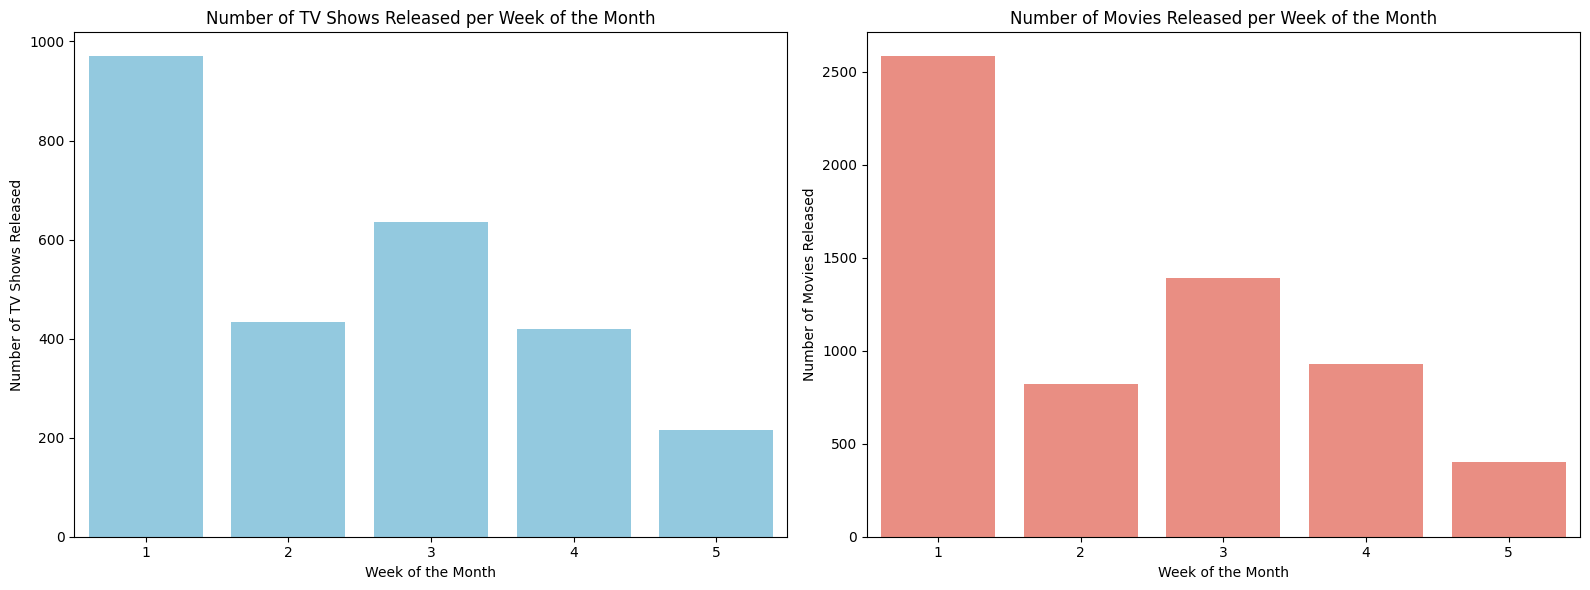

In [ ]:
# Ensure date_added is in datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Handle any errors in conversion

# Calculate the week number within the month
df['Week_of_Month'] = df['date_added'].apply(lambda x: (x.day - 1) // 7 + 1)

# Filter for TV shows and Movies
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Group by week number within the month and count the number of TV shows and Movies
weekly_tv_shows_count = tv_shows.groupby('Week_of_Month').size().reset_index(name='Count')
weekly_movies_count = movies.groupby('Week_of_Month').size().reset_index(name='Count')

# Create subplots side by side using Seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for TV Shows
sns.barplot(data=weekly_tv_shows_count, x='Week_of_Month', y='Count', color='skyblue', ax=ax1)
ax1.set_xlabel('Week of the Month')
ax1.set_ylabel('Number of TV Shows Released')
ax1.set_title('Number of TV Shows Released per Week of the Month')

# Plot for Movies
sns.barplot(data=weekly_movies_count, x='Week_of_Month', y='Count', color='salmon', ax=ax2)
ax2.set_xlabel('Week of the Month')
ax2.set_ylabel('Number of Movies Released')
ax2.set_title('Number of Movies Released per Week of the Month')

# Adjust layout
plt.tight_layout()

# Drop the Week_of_Month column from df after the analysis
df.drop(columns=['Week_of_Month'], inplace=True)
plt.show()

From analyzing the bar graphs, we can draw the following conclusions:

  * TV Shows and Movies Release Trend: Both TV shows and movies exhibit a descending trend in releases as the month progresses. Week 1 sees the highest number of releases, followed by a gradual decline in subsequent weeks.
  * Recommendation for Distributors: To avoid high competition, consider releasing content during weeks 3 or 4 when fewer new shows and movies are launched. Additionally, focus marketing efforts towards the end of the month.

## Find which is the best month to release the Tv-show or the movie.

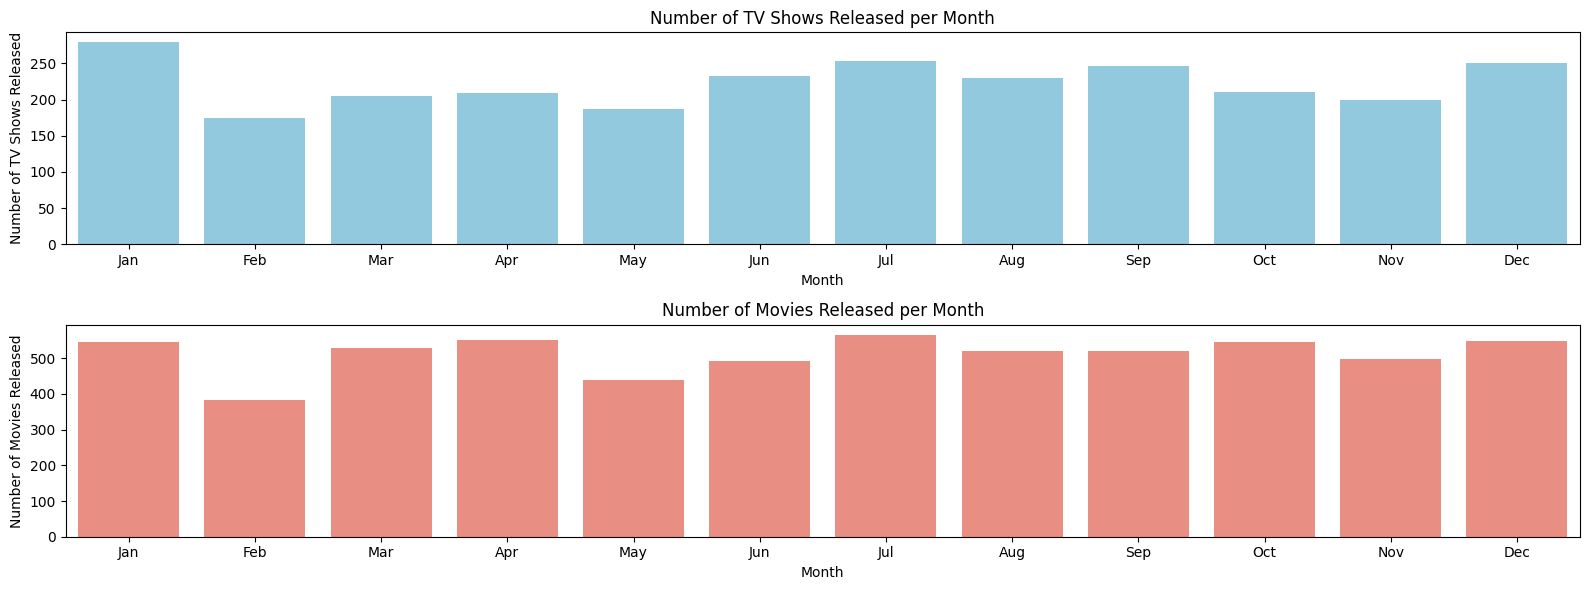

In [ ]:
# Extract the month from the date_added column
df['Month'] = df['date_added'].dt.strftime('%b')

# Filter for TV shows
tv_shows = df[df['type'] == 'TV Show']

# Group by month and count the number of TV shows
monthly_tv_shows_count = tv_shows.groupby('Month').size().reset_index(name='Count')

# Filter for Movies
movies = df[df['type'] == 'Movie']

# Group by month and count the number of movies
monthly_movies_count = movies.groupby('Month').size().reset_index(name='Count')

# Define the correct month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create subplots side by side using Seaborn
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6))

# Plot for TV Shows
sns.barplot(data=monthly_tv_shows_count, x='Month', y='Count', color='skyblue', ax=ax1, order=month_order)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of TV Shows Released')
ax1.set_title('Number of TV Shows Released per Month')

# Plot for Movies
sns.barplot(data=monthly_movies_count, x='Month', y='Count', color='salmon', ax=ax2, order=month_order)
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Movies Released')
ax2.set_title('Number of Movies Released per Month')

# Adjust layout
plt.tight_layout()

# Drop the month column from df after the analysis
df.drop(columns=['Month'], inplace=True)

plt.show()


* TV Shows Release Trend:

  * TV shows exhibit a seasonal pattern in releases.
  * The highest number of TV shows are released in January, followed by a gradual decline until April.
  * After April, there are fluctuations, but the overall trend remains downward.
  * Recommendation: For TV shows, consider strategic releases during peak months (e.g., January) and avoid competing with movie releases during those times.
* Movie Release Consistency:
  * Movies show a consistent number of releases each month.
Slight increases are observed in March, June, August, and October.
  * Recommendation: Movie production can be planned to maintain a stable release schedule throughout the year.

## Identify the top 10 actors who have appeared in most movies or TV shows.


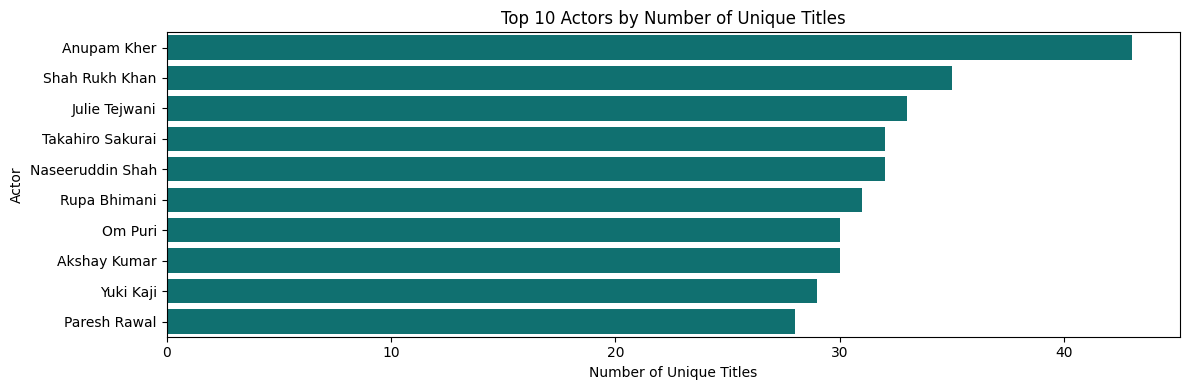

In [ ]:
# Remove rows where cast is 'Missing Cast'
final_df_without_missing_cast = final_df[final_df['cast'] != 'Missing Cast']

# Group by actor and count unique titles
actor_counts = final_df_without_missing_cast.groupby('cast')['title'].nunique().reset_index(name='unique_title_count')

# Get the top 10 actors by unique title count
top_10_actors = actor_counts.sort_values(by='unique_title_count', ascending=False).head(10)

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(12, 4))
sns.barplot(data=top_10_actors, y='cast', x='unique_title_count', color='teal')

# Customize plot
plt.xlabel('Number of Unique Titles')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Unique Titles')

# Show plot
plt.tight_layout()
plt.show()

* Inferance :

  * Anupam Kher and Amitabh Bachchan lead with the most extensive filmographies, having around 35-40 unique titles each, highlighting their prolific careers.

  * Shah Rukh Khan and Aamir Khan follow with around 20-30 titles, known for their iconic and thought-provoking roles.

  * Salman Khan, Akshay Kumar, Ajay Devgn, Naseeruddin Shah, Irrfan Khan, and Rajinikanth have between 8-20 unique titles, each contributing significantly to cinema with distinct styles and appeal.

* Recommendations:

  * Diversify roles: Actors should explore diverse genres and roles to enhance their unique title count.
  * Prioritize quality over quantity: While having many titles is commendable, maintaining quality is crucial.
  * Leverage global appeal: Actors like Shah Rukh Khan and Rajinikanth can leverage their global fan base for more unique titles.
  * Focus on legacy: Naseeruddin Shah and Irrfan Khan’s legacy lies in their impactful performances.

## Identify the top 10 directors who have appeared in most movies or TV shows.

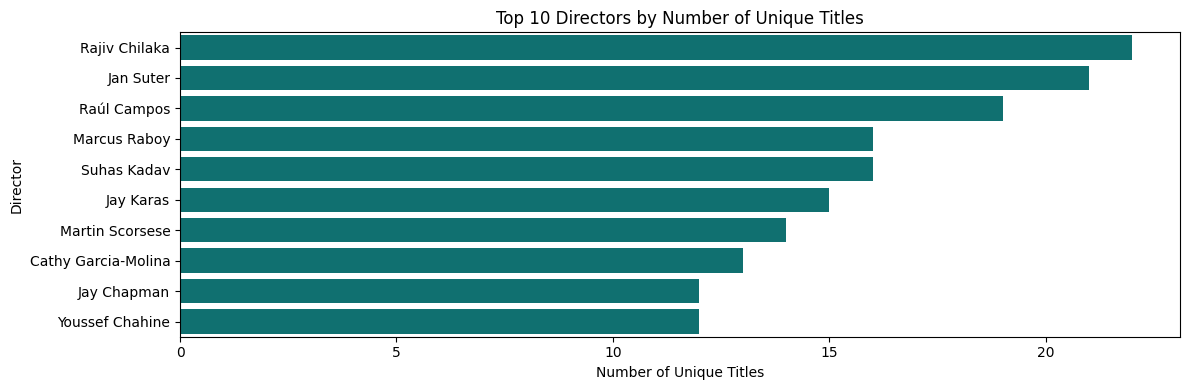

In [ ]:
# Remove rows where director is 'Missing Director'
filtered_df = final_df[final_df['director'] != 'Missing Director']

# Group by director and count unique titles
director_counts = filtered_df.groupby('director')['title'].nunique().reset_index(name='unique_title_count')

# Get the top 10 directors by unique title count
top_10_directors = director_counts.sort_values(by='unique_title_count', ascending=False).head(10)

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(12, 4))
sns.barplot(data=top_10_directors, y='director', x='unique_title_count', color='teal')

# Customize plot
plt.xlabel('Number of Unique Titles')
plt.ylabel('Director')
plt.title('Top 10 Directors by Number of Unique Titles')

# Show plot
plt.tight_layout()
plt.show()

* Inference:
  * Among the top ten directors listed, Rajiv Chilaka has directed the most number of unique titles.
  * There is significant variation in productivity among these directors, with some having fewer titles than others.
* Recommendation:
  * If you are looking to explore a diverse range of works from a single director, consider starting with prolific creators like Rajiv Chilaka.
  * Additionally, exploring works by directors with fewer titles may offer unique perspectives and styles not found in more prolific bodies of work.

## Which genre movies are more popular or produced more

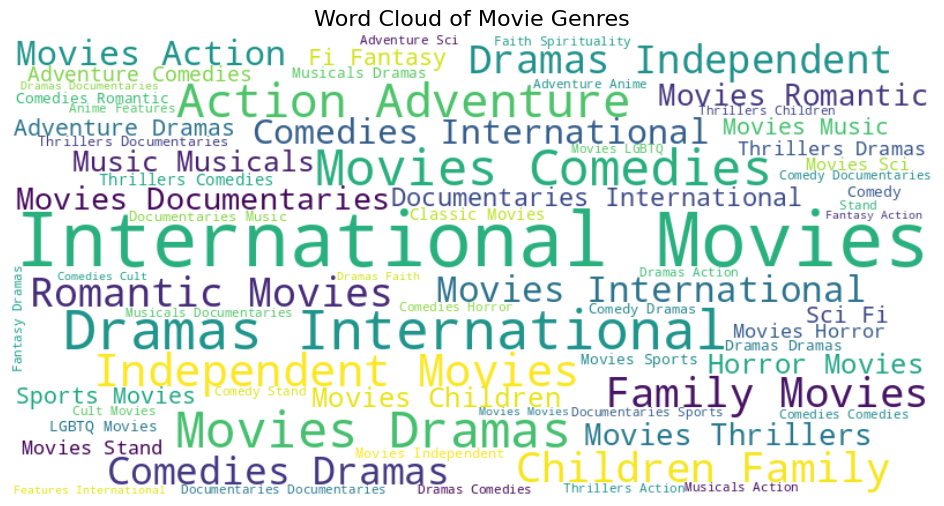

In [ ]:
# Filter the data for Movies and exclude rows with 'Missing Genre'
data = final_df[(final_df['type'] == 'Movie') & (final_df['genre'] != 'Missing Genre')]

# Combine all genres into a single string, considering unique titles and genres
# Use drop_duplicates to ensure unique title-genre pairs
unique_genre_titles = data[['title', 'genre']].drop_duplicates()
genres_combined = ' '.join(unique_genre_titles['genre'].str.replace(r'\s+', ' ', regex=True).str.strip())

# Create a word cloud object with improved readability
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_font_size=100,
    min_font_size=10
).generate(genres_combined)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres', fontsize=16)
plt.show()


* Inference:
  * The word cloud reveals that genres like “International,” “Movies,” “Dramas,” and “Comedies” are prominent, as they appear in larger fonts.
  * Genres such as “Action,” “Romantic,” and “Documentaries” are also present but in smaller sizes, indicating their relative frequency.
  * International movies and dramas seem to be particularly popular within the dataset.
* Recommendation:
  * If you’re curating content for a streaming service or looking to expand your movie library, consider focusing on acquiring more international films and dramas. These genres appear to resonate with the audience.

## Find after how many days the movie will be added to Netflix after the release of the movie

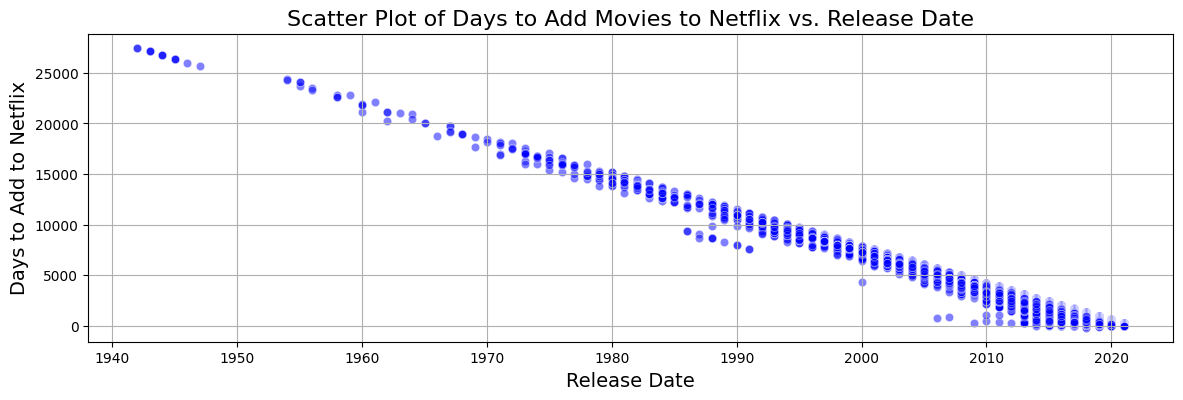

In [ ]:
# Filter the DataFrame to include only movies
movies_df = df[df['type'] == 'Movie'].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Convert 'release_year' to datetime (assume release_date is January 1st of the release year)
movies_df.loc[:, 'release_date'] = pd.to_datetime(movies_df['release_year'].astype(str) + '-01-01')

# Calculate the difference in days between 'date_added' and 'release_date'
movies_df.loc[:, 'days_to_add'] = (movies_df['date_added'] - movies_df['release_date']).dt.days

# Drop any rows with missing 'days_to_add'
movies_df = movies_df.dropna(subset=['days_to_add'])

# Scatter Plot
plt.figure(figsize=(14, 4))
sns.scatterplot(x='release_date', y='days_to_add', data=movies_df, alpha=0.5, color='blue')
plt.title('Scatter Plot of Days to Add Movies to Netflix vs. Release Date', fontsize=16)
plt.xlabel('Release Date', fontsize=14)
plt.ylabel('Days to Add to Netflix', fontsize=14)
plt.grid(True)
plt.show()

* Inference:
  * The scatter plot shows a negative correlation between the release date of a movie and the time it takes for that movie to be added to Netflix.
  * Newer movies are added to Netflix more quickly than older ones.
* Recommendation:
  * To efficiently update content, Netflix should continue prioritizing newer releases for quicker addition.
  * While catering to classic film enthusiasts, selectively incorporating older titles can balance the library.

## How Has the Number of Movies Released Per Year Changed Over the Last 20-30 Years?

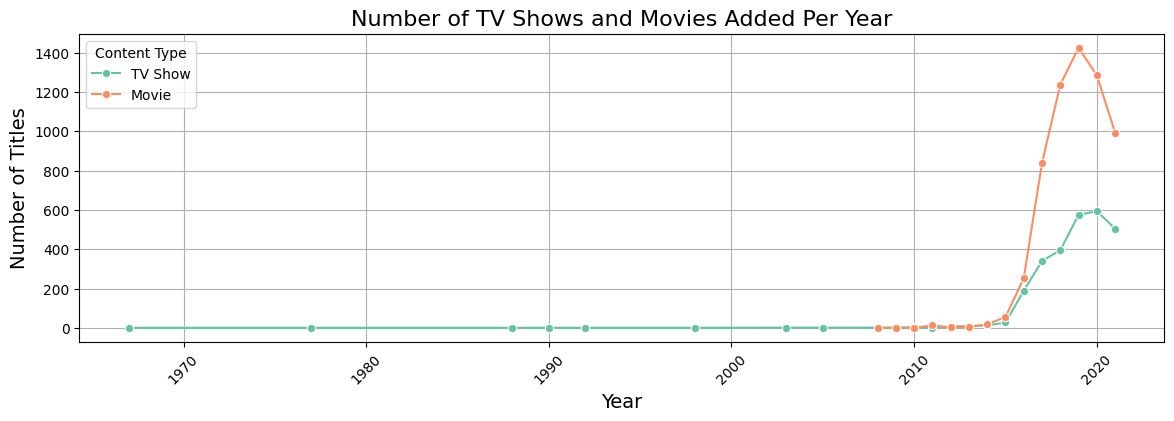

In [ ]:
# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Group by year_added and type, then count the number of entries
content_per_year = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Plot the trend
plt.figure(figsize=(14, 4))
sns.lineplot(x='year_added', y='count', hue='type', data=content_per_year, marker='o', palette='Set2')
plt.title('Number of TV Shows and Movies Added Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Content Type')

#  Drop the 'year_added' column
df = df.drop(columns=['year_added'])

plt.show()

Based on the graph titled “Number of TV Shows and Movies Added Per Year,” here are the key takeaways:

* TV Shows Trend: The number of TV shows added per year remained relatively low before 1970, gradually increased, and then spiked significantly around 2010.
* Movie Trend: The number of movies added per year started slightly higher than TV shows before 1970, remained flat until around 2005, and then surged dramatically after 2019.
* Recommendation: Content platforms should expand storage and streaming capabilities to accommodate the growing library of titles. Enhancing content discovery features will help users navigate the increasing selection.

## What type of content is available in top 15 countries?

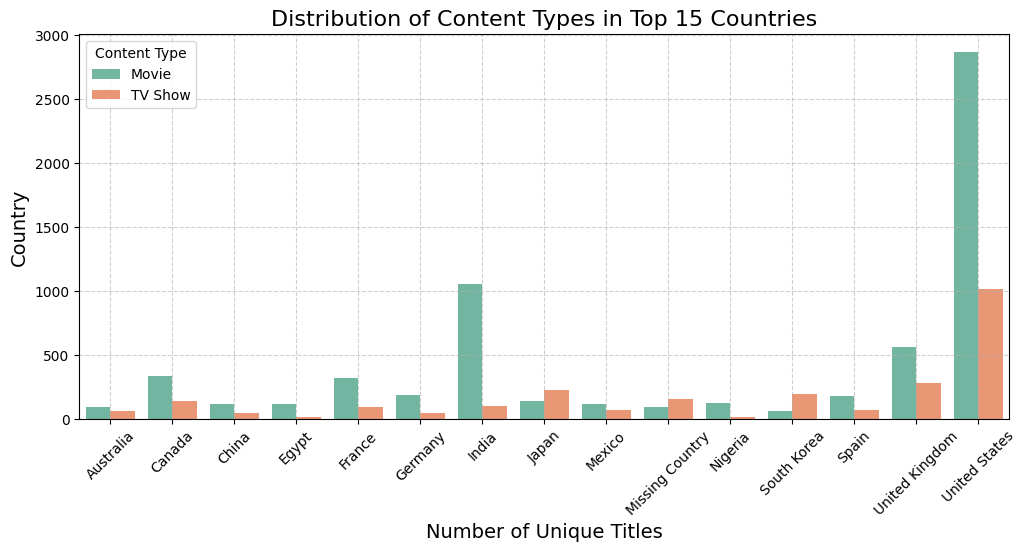

In [ ]:
# Group by country and type, then count the number of unique titles
content_by_country = final_df.groupby(['country', 'type'])['title'].nunique().reset_index(name='unique_titles')

# Aggregate the total unique titles by country
total_titles_by_country = content_by_country.groupby('country')['unique_titles'].sum().reset_index()

# Get the top 15 countries with the most content
top_15_countries = total_titles_by_country.nlargest(15, 'unique_titles')

# Filter content_by_country to include only the top 15 countries
top_content_by_country = content_by_country[content_by_country['country'].isin(top_15_countries['country'])]

# Plot the distribution
plt.figure(figsize=(12, 5))

# Create a bar plot with countries on the y-axis and counts of unique titles on the x-axis
sns.barplot(data=top_content_by_country, y='unique_titles', x='country', hue='type', palette='Set2')

plt.title('Distribution of Content Types in Top 15 Countries', fontsize=16)
plt.xlabel('Number of Unique Titles', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.legend(title='Content Type')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

* Inference:
  * The United States has the highest number of unique titles for both movies and TV shows, indicating a robust market for content consumption.
  * Other countries like the United Kingdom and India also have substantial content libraries, although smaller than the US.
* Recommendations:
  * For streaming services looking to expand globally, consider tailoring content offerings based on regional preferences.
  * In countries with fewer unique titles (e.g., Egypt, Nigeria), there may be opportunities to introduce more diverse content.
  * Focusing on increasing TV show titles could be beneficial in markets where they are currently outnumbered by movies.